In [56]:
import os
os.getcwd()


'C:\\Users\\Inspiron\\Desktop\\projet_inter\\ProjetInterpromo2020G8'

In [1]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [3]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [4]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


In [5]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image

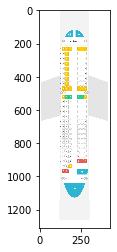

In [6]:
img = plt.imread('images/British_Airways_Airbus_A319_C_plane331.svg.png')
plt.imshow(img)

In [7]:
# recover the rgb of a given pixel
img = Image.open('images/British_Airways_Airbus_A319_C_plane331.svg.png')
coordonee = x, y = 10, 100
img.getpixel(coordonee)[:3]

(0, 0, 0)

In [8]:
# recover the pixel size of an image
#img.size
(a,b)=img.size
print("a= ",a,"b= ",b)

a=  425 b=  1310


In [19]:
# input manual version
def get_rgb(image, x, y):
    return image.getpixel((x,y))[:3]

def get_shape(image):
    return image.size

i = Image.open('images/British_Airways_Airbus_A319_C_plane331.svg.png')
x, y = 10, 105
rgb_code = get_rgb(i, x, y)
rgb_code

(0, 0, 0)

## 
Test des pixels suivant avec boucle

In [20]:
# recover neighbors of a given pixel its coordinates with a neighbor step-distance
def x_y_neighboors(image, x, y, step=2):
    rgb_neighboors_val = []
    (a, b) = get_shape(image)
    for x_ in range (x-step, x-1+step):
        if x_ >= 0 and x_ < a:
            for y_ in range (y-step, y-1+step):
                if  y_>= 0 and y_ < b:
                    rgb_neighboors_val.append([x_, y_, get_rgb(image, x_, y_)])
                
    return rgb_neighboors_val
x, y = 20,105
x_y_neighboors(img, x, y, step=2)
###########################


[[18, 103, (0, 0, 0)],
 [18, 104, (0, 0, 0)],
 [18, 105, (0, 0, 0)],
 [19, 103, (0, 0, 0)],
 [19, 104, (0, 0, 0)],
 [19, 105, (0, 0, 0)],
 [20, 103, (0, 0, 0)],
 [20, 104, (0, 0, 0)],
 [20, 105, (0, 0, 0)]]

In [11]:
def x_y_neighboors(image, x, y, step=2):
    rgb_neighboors_val = []
    (a, b) = get_shape(image)
    for x_ in range (x-step, x-1+step):
        if x_ >= 0 and x_ < a:
            for y_ in range (y-step, y-1+step):
                if  y_>= 0 and y_ < b:
                    rgb_neighboors_val.append([x_, y_, get_rgb(image, x_, y_)])
                
    return rgb_neighboors_val

def count_nb_same_pixel(image, x, y, rgb_neighboors):
    pixel_ref = get_rgb(image, x, y)
    count = -1
    for rgb_n in rgb_neighboors:
        if rgb_n[2] == pixel_ref:
            count +=  1
        
    return count / len(rgb_neighboors), pixel_ref
    

x, y = 20,105
rgb_neighboors = x_y_neighboors(img, x, y, step=50)
count_nb_same_pixel(img, x, y, rgb_neighboors)

(0.9998536085492608, (0, 0, 0))

In [1]:
# code brouillon
# recupere neighbors for each pixel
def x_y_neighboors(image, x, y, step=2):
    rgb_neighboors_val = []
    (a, b) = get_shape(image)
    
    x_=0
    y_=0
    for x_ in range (a-1):
        for y_ in range (b-1):
            for x_ in range (x-step, x-1+step):
                if x_ >= 0 and x_ < a:
                    for y_ in range (y-step, y-1+step):
                        if  y_>= 0 and y_ < b:
                            rgb_neighboors_val.append([x_, y_, get_rgb(image, x_, y_)])

    return rgb_neighboors_val

def count_nb_same_pixel(image, x, y, rgb_neighboors):
    pixel_ref = get_rgb(image, x, y)
    count = -1
    for rgb_n in rgb_neighboors:
        if rgb_n[2] == pixel_ref:
            count +=  1
        
    return count / len(rgb_neighboors), pixel_ref
    

rgb_neighboors = x_y_neighboors(img, x, y, step=50)
count_nb_same_pixel(img, x, y, rgb_neighboors)

NameError: name 'img' is not defined